In [1]:
from sklearn.datasets import fetch_openml
mnist= fetch_openml('mnist_784',as_frame=False)
X= mnist.data
Y =mnist.target

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,StackingClassifier,VotingClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

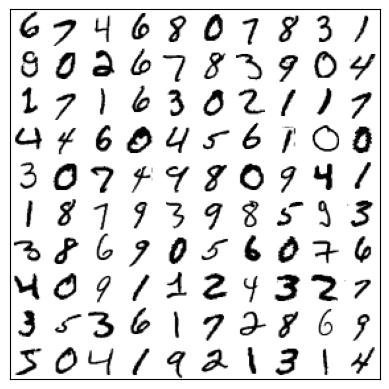

In [3]:
size=10
for index, images in enumerate(mnist.data[:size*size]):
    x= index%size
    y= index// size
    plt.imshow(images.reshape(28,28),cmap='binary',extent=(x,x+1,y,y+1))
plt.axis((0,size,0,size))
plt.xticks([])
plt.yticks([])
plt.show()

In [4]:
trainx,testx,trainy,testy= train_test_split(X,Y,test_size=0.2)

In [5]:
rfc=RandomForestClassifier(n_estimators=30,max_depth=28)
rfc.fit(trainx,trainy)

RandomForestClassifier(max_depth=28, n_estimators=30)

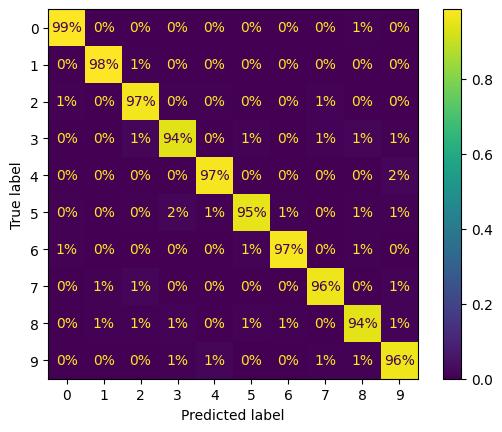

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib.colors import ListedColormap
pred_rfc=rfc.predict(testx)
ConfusionMatrixDisplay.from_predictions(testy,pred_rfc,values_format=".0%",normalize='true')

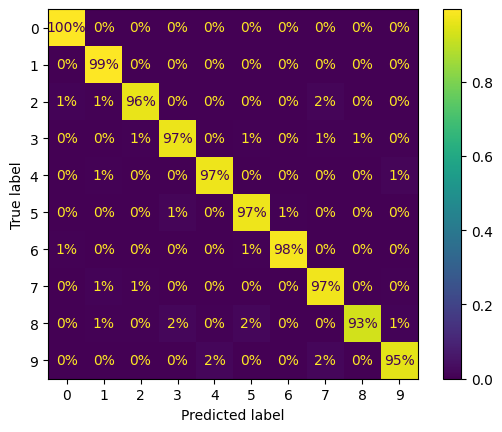

In [7]:
knc = KNeighborsClassifier(n_neighbors=4)
knc.fit(trainx,trainy)
pred_knc= knc.predict(testx)
ConfusionMatrixDisplay.from_predictions(testy,pred_knc,values_format=".0%",normalize='true')


/home/prashant/Study material/WORK_SPACES/Python/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


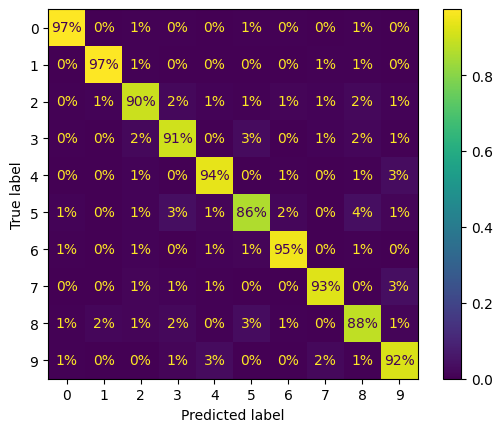

In [8]:
lr = LogisticRegression()
lr.fit(trainx,trainy)
pred_lr= lr.predict(testx)
ConfusionMatrixDisplay.from_predictions(testy,pred_lr,values_format=".0%",normalize='true')


In [9]:
print("Score KNC =",knc.score(testx,testy))
print("Score RFC =",rfc.score(testx,testy))
print("Score LR =",lr.score(testx,testy))

Score KNC = 0.9703571428571428
Score RFC = 0.9642857142857143
Score LR = 0.924


In [10]:
vote_clf_hard=VotingClassifier(estimators=[('KNC',knc),('RFC',rfc),('LR',lr)],n_jobs=-1,)
vote_clf_soft=VotingClassifier(estimators=[('KNC',knc),('RFC',rfc),('LR',lr)],n_jobs=-1,voting='soft')
vote_clf_hard.fit(trainx,trainy)
vote_clf_soft.fit(trainx,trainy)
print("Score voting classifier hard=",vote_clf_hard.score(testx,testy))
print("Score voting classifier soft=",vote_clf_soft.score(testx,testy))


/home/prashant/Study material/WORK_SPACES/Python/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/prashant/Study material/WORK_SPACES/Python/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

Score voting classifier hard= 0.9668571428571429
Score voting classifier soft= 0.9682857142857143


In [11]:
stack_clf= StackingClassifier(estimators=[('KNC',knc),('RFC',rfc),('LR',lr)],n_jobs=-1,cv=2)
stack_clf.fit(trainx,trainy)
stack_clf.score(testx,testy)

/home/prashant/Study material/WORK_SPACES/Python/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/prashant/Study material/WORK_SPACES/Python/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

0.9769285714285715

In [12]:
GBC= GradientBoostingClassifier(n_iter_no_change=3,subsample=0.3)
GBC.fit(trainx,trainy)
GBC.score(testx,testy)

0.9137142857142857

Stacking classifier performed slightly better than any other algorithms like gradientboosting and voting classifier, 